## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\anaar\OneDrive\Documents\World Happiness Report'

Importing clean data sets

In [14]:
df_2015= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2015_6_3.csv'))

In [15]:
df_2016= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2016_6_3.csv'))

In [16]:
df_2017= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2017_6_3.csv'))

In [17]:
df_2018 = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2018_6_3.csv'))

In [18]:
df_2019= pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2019_6_3.csv'))

In [19]:
df_2015.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [20]:
df_2016.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [22]:
df_2017.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

In [23]:
df_2018.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Score', 'Happiness Rank',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

In [24]:
df_2019.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Score', 'Happiness Rank',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

In [25]:
#Droping 'Unnamed: 0' of all data sets
# List of DataFrames
data_frames = [df_2015, df_2016, df_2017, df_2018, df_2019]

# Drop 'Unnamed: 0' column from each DataFrame
for df in data_frames:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

In [45]:
# Ordering the columns in a cohesive way for all dfs
column_order = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 
                 'GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 
                 'Freedom to Make Life Choices', 'Perceptions of Corruption', 'Generosity']

# Reorder the columns for df_2015
df_2017 = df_2017[column_order]

# Reorder the columns for df_2016
df_2018 = df_2018[column_order]

# Reorder the columns for df_2016
df_2019 = df_2019[column_order]

In [46]:
#checking for output 
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [47]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [48]:
df_2017.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [49]:
df_2018.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [50]:
df_2019.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption',
       'Generosity'],
      dtype='object')

In [51]:
#Checking for shape of all dataframes
df_2015.shape

(158, 10)

In [52]:
df_2016.shape

(157, 10)

In [53]:
df_2017.shape

(155, 10)

In [54]:
df_2018.shape

(156, 10)

In [55]:
df_2019.shape

(156, 10)

In [56]:
#checking for missing values of all dataframes 
# List of DataFrames
data_frames = [df_2015, df_2016, df_2017, df_2018, df_2019]

# Iterate over each DataFrame
for i, df in enumerate(data_frames, start=2015):
    print(f"Missing values in DataFrame {i}:")
    print(df.isnull().sum())
    print()

Missing values in DataFrame 2015:
Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
GDP per Capita                  0
Social Support                  0
Healthy Life Expectancy         0
Freedom to Make Life Choices    0
Perceptions of Corruption       0
Generosity                      0
dtype: int64

Missing values in DataFrame 2016:
Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
GDP per Capita                  0
Social Support                  0
Healthy Life Expectancy         0
Freedom to Make Life Choices    0
Perceptions of Corruption       0
Generosity                      0
dtype: int64

Missing values in DataFrame 2017:
Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
GDP per Capita                  0
Social Support      

No missing values 

In [57]:
#chekcing for duplicates 
# List of DataFrames
data_frames = [df_2015, df_2016, df_2017, df_2018, df_2019]

# Iterate over each DataFrame
for i, df in enumerate(data_frames, start=2015):
    print(f"Duplicates in DataFrame {i}:")
    print(df.duplicated().sum())
    print()

Duplicates in DataFrame 2015:
0

Duplicates in DataFrame 2016:
0

Duplicates in DataFrame 2017:
0

Duplicates in DataFrame 2018:
0

Duplicates in DataFrame 2019:
0



No duplicates found

In [58]:
#final head check
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [59]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [60]:
df_2017.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [61]:
df_2018.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,Finland,Western Europe,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,Western Europe,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,Western Europe,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,Western Europe,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,Western Europe,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [62]:
df_2019.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity
0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322


#### Exporting clean data frames

In [63]:
df_2015.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2015_6_4.csv'))

In [66]:
df_2016.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2016_6_4.csv'))

In [67]:
df_2017.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2017_6_4.csv'))

In [68]:
df_2018.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2018_6_4.csv'))

In [69]:
df_2019.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2019_6_4.csv'))

##### Extreme values checks

C:\Users\anaar\AppData\Local\Temp\ipykernel_51708\3612779952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2015['Happiness Score'], bins=25) # Shows extreme values
C:\Users\anaar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Density'>

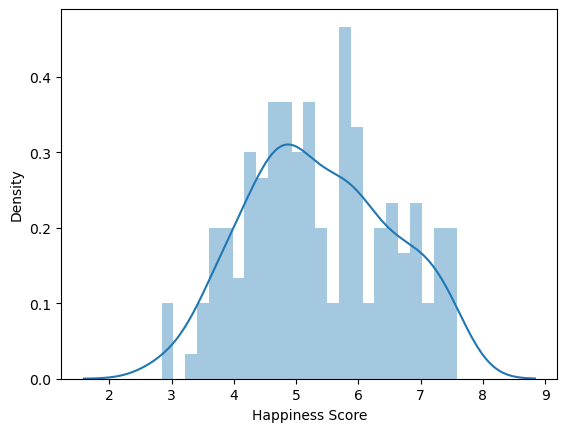

In [71]:
sns.distplot(df_2015['Happiness Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\anaar\AppData\Local\Temp\ipykernel_51708\3486223871.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2016['Happiness Score'], bins=25) # Shows extreme values
C:\Users\anaar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Density'>

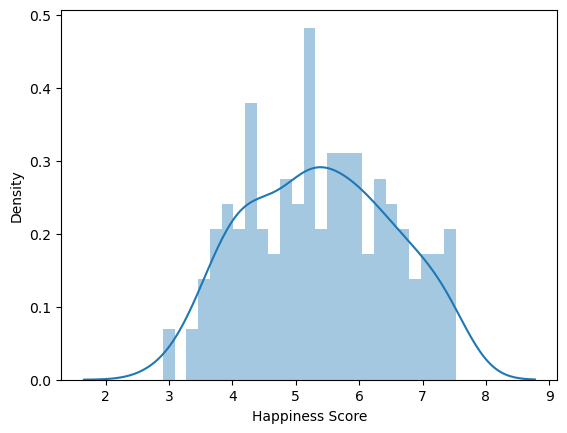

In [72]:
sns.distplot(df_2016['Happiness Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\anaar\AppData\Local\Temp\ipykernel_51708\3295759999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2017['Happiness Score'], bins=25) # Shows extreme values
C:\Users\anaar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Density'>

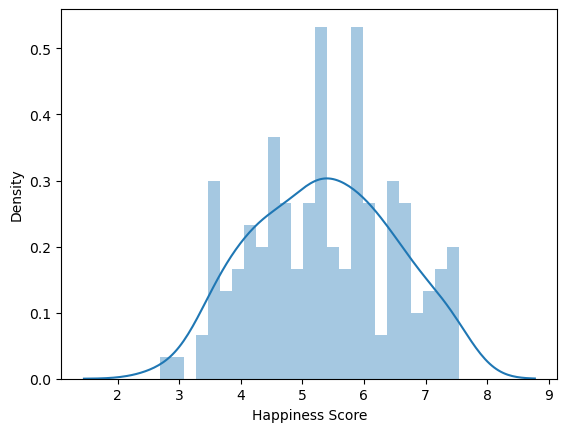

In [73]:
sns.distplot(df_2017['Happiness Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\anaar\AppData\Local\Temp\ipykernel_51708\1523152327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2018['Happiness Score'], bins=25) # Shows extreme values
C:\Users\anaar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Density'>

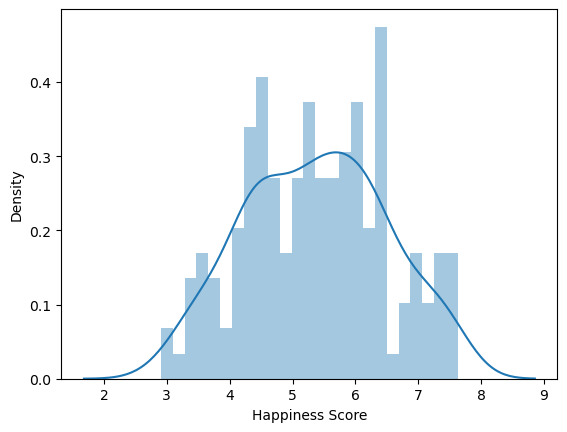

In [74]:
sns.distplot(df_2018['Happiness Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\anaar\AppData\Local\Temp\ipykernel_51708\1774639371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019['Happiness Score'], bins=25) # Shows extreme values
C:\Users\anaar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Density'>

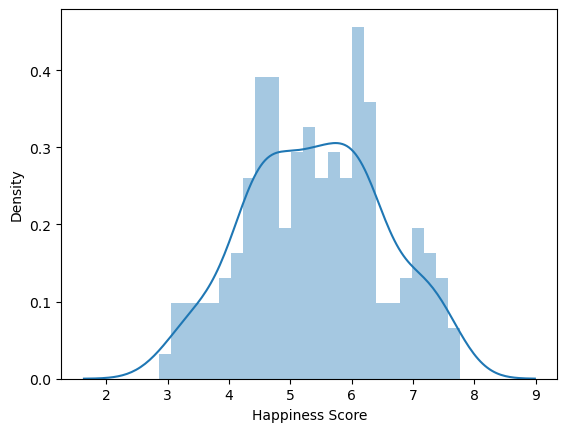

In [75]:
sns.distplot(df_2019['Happiness Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [83]:
# Calculating mean for each dataframe
mean_2015 = df_2015['Happiness Score'].mean()
mean_2016 = df_2016['Happiness Score'].mean()
mean_2017 = df_2017['Happiness Score'].mean()
mean_2018 = df_2018['Happiness Score'].mean()
mean_2019 = df_2019['Happiness Score'].mean()

# Formatting mean values to two decimal places
mean_2015_formatted = round(mean_2015, 2)
mean_2016_formatted = round(mean_2016, 2)
mean_2017_formatted = round(mean_2017, 2)
mean_2018_formatted = round(mean_2018, 2)
mean_2019_formatted = round(mean_2019, 2)

# Printing the mean for each year
print("Mean Happiness Score for 2015:", mean_2015_formatted)
print("Mean Happiness Score for 2016:", mean_2016_formatted)
print("Mean Happiness Score for 2017:", mean_2017_formatted)
print("Mean Happiness Score for 2018:", mean_2018_formatted)
print("Mean Happiness Score for 2019:", mean_2019_formatted)

Mean Happiness Score for 2015: 5.38
Mean Happiness Score for 2016: 5.38
Mean Happiness Score for 2017: 5.35
Mean Happiness Score for 2018: 5.38
Mean Happiness Score for 2019: 5.41


In [79]:
# Calculating median for each dataframe
median_2015 = df_2015['Happiness Score'].median()
median_2016 = df_2016['Happiness Score'].median()
median_2017 = df_2017['Happiness Score'].median()
median_2018 = df_2018['Happiness Score'].median()
median_2019 = df_2019['Happiness Score'].median()

# Formatting median values to two decimal places
median_2015_formatted = round(median_2015, 2)
median_2016_formatted = round(median_2016, 2)
median_2017_formatted = round(median_2017, 2)
median_2018_formatted = round(median_2018, 2)
median_2019_formatted = round(median_2019, 2)

# Printing the median for each year
print("Median Happiness Score for 2015:", median_2015_formatted)
print("Median Happiness Score for 2016:", median_2016_formatted)
print("Median Happiness Score for 2017:", median_2017_formatted)
print("Median Happiness Score for 2018:", median_2018_formatted)
print("Median Happiness Score for 2019:", median_2019_formatted)

Median Happiness Score for 2015: 5.23
Median Happiness Score for 2016: 5.31
Median Happiness Score for 2017: 5.28
Median Happiness Score for 2018: 5.38
Median Happiness Score for 2019: 5.38


In [86]:
# Calculating max for each dataframe
max_2015 = df_2015['Happiness Score'].max()
max_2016 = df_2016['Happiness Score'].max()
max_2017 = df_2017['Happiness Score'].max()
max_2018 = df_2018['Happiness Score'].max()
max_2019 = df_2019['Happiness Score'].max()

# Formatting max values to two decimal places
max_2015_formatted = round(max_2015, 2)
max_2016_formatted = round(max_2016, 2)
max_2017_formatted = round(max_2017, 2)
max_2018_formatted = round(max_2018, 2)
max_2019_formatted = round(max_2019, 2)

# Calculating min for each dataframe
min_2015 = df_2015['Happiness Score'].min()
min_2016 = df_2016['Happiness Score'].min()
min_2017 = df_2017['Happiness Score'].min()
min_2018 = df_2018['Happiness Score'].min()
min_2019 = df_2019['Happiness Score'].min()

# Formatting min values to two decimal places
min_2015_formatted = round(min_2015, 2)
min_2016_formatted = round(min_2016, 2)
min_2017_formatted = round(min_2017, 2)
min_2018_formatted = round(min_2018, 2)
min_2019_formatted = round(min_2019, 2)

# Printing the results
print("Max & Min for Happiness Score:")
print("Year\tMax\tMin")
print(f"2015\t{max_2015_formatted}\t{min_2015_formatted}")
print(f"2016\t{max_2016_formatted}\t{min_2016_formatted}")
print(f"2017\t{max_2017_formatted}\t{min_2017_formatted}")
print(f"2018\t{max_2018_formatted}\t{min_2018_formatted}")
print(f"2019\t{max_2019_formatted}\t{min_2019_formatted}")


Max & Min for Happiness Score:
Year	Max	Min
2015	7.59	2.84
2016	7.53	2.9
2017	7.54	2.69
2018	7.63	2.9
2019	7.77	2.85


The data for Happiness score looks good, there does not seem to be any outlier.

### 3. Data prep for regression analysis 

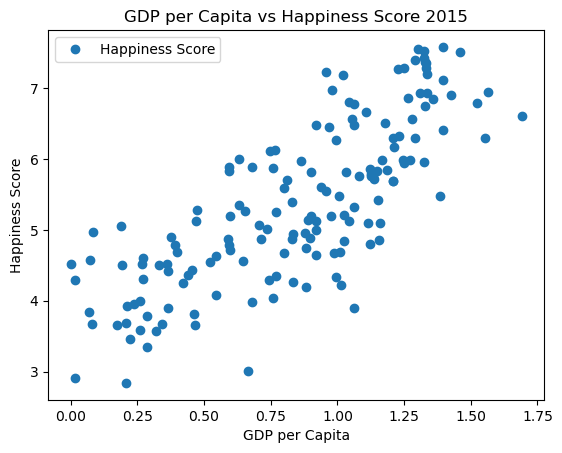

In [94]:
# Create a scatterplot using matplotlib for Happiness Score and GDP

df_2015.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Happiness Score 2015')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

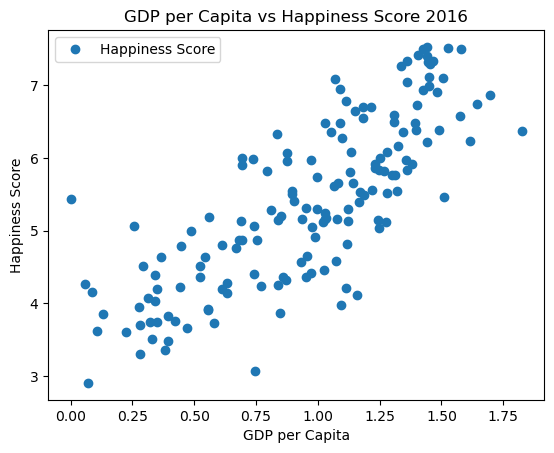

In [90]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2016.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Happiness Score 2016')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

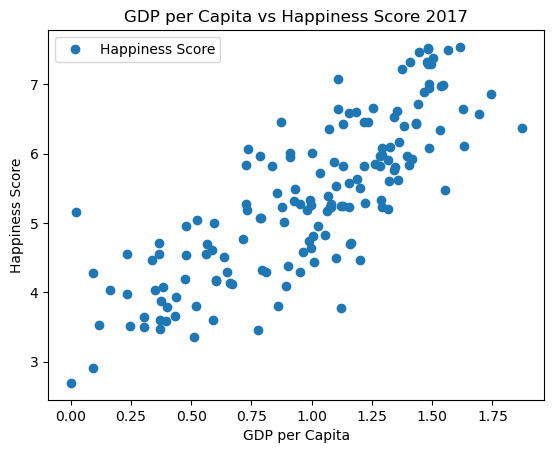

In [91]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2017.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Happiness Score 2017')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

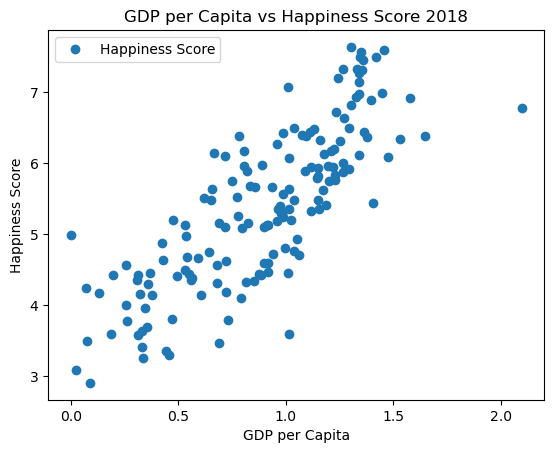

In [92]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2018.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Happiness Score 2018')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

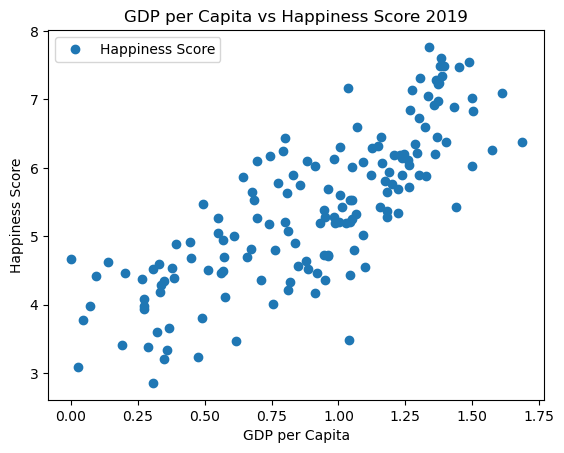

In [93]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2019.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP per Capita vs Happiness Score 2019')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

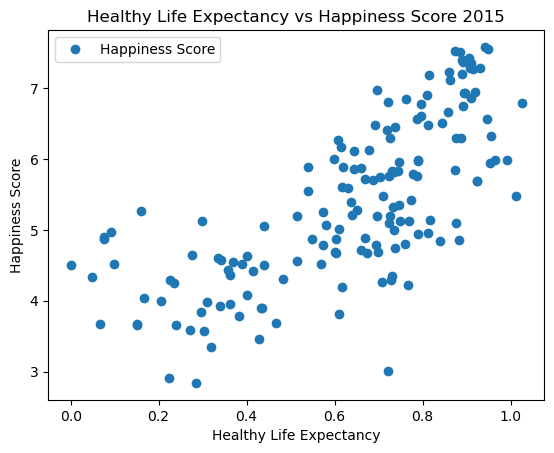

In [95]:
# Create a scatterplot using matplotlib for Happiness Score and Healthy Life Expectancy

df_2015.plot(x = 'Healthy Life Expectancy', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Healthy Life Expectancy vs Happiness Score 2015')  
plt.xlabel('Healthy Life Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()

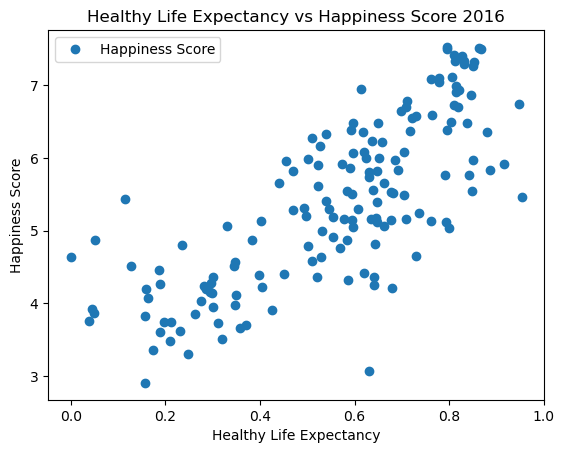

In [97]:
# Create a scatterplot using matplotlib for Happiness Score and Healthy Life Expectancy

df_2016.plot(x = 'Healthy Life Expectancy', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Healthy Life Expectancy vs Happiness Score 2016')  
plt.xlabel('Healthy Life Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()

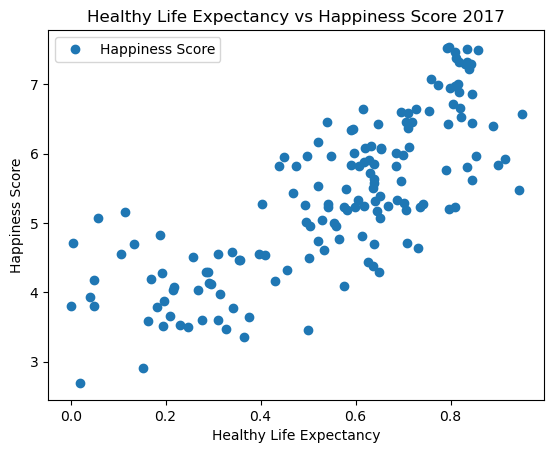

In [98]:
# Create a scatterplot using matplotlib for Happiness Score and Healthy Life Expectancy

df_2017.plot(x = 'Healthy Life Expectancy', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Healthy Life Expectancy vs Happiness Score 2017')  
plt.xlabel('Healthy Life Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()

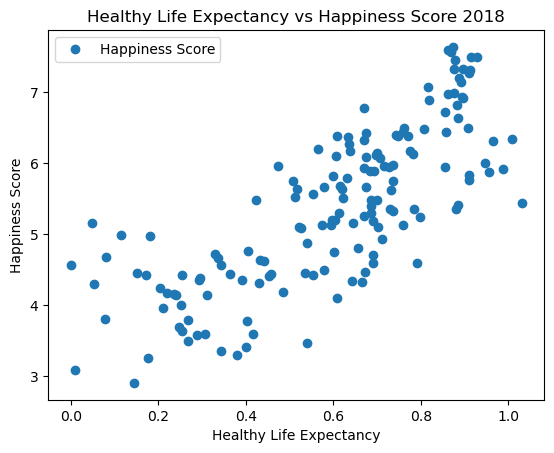

In [99]:
# Create a scatterplot using matplotlib for Happiness Score and Healthy Life Expectancy

df_2018.plot(x = 'Healthy Life Expectancy', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Healthy Life Expectancy vs Happiness Score 2018')  
plt.xlabel('Healthy Life Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()

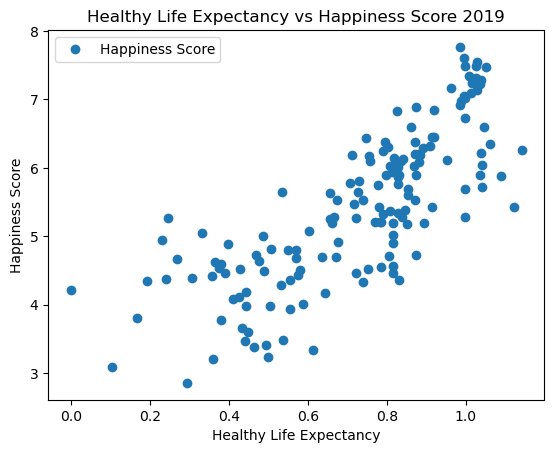

In [100]:
# Create a scatterplot using matplotlib for Happiness Score and Healthy Life Expectancy

df_2019.plot(x = 'Healthy Life Expectancy', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Healthy Life Expectancy vs Happiness Score 2019')  
plt.xlabel('Healthy Life Expectancy')  
plt.ylabel('Happiness Score')  
plt.show()

My hypotheses are: 
1. The Happiness Score is positively correlated to GDP.
2. GDP has a higher impact on the happiness score than the healthy life expectancy. 

In [102]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2015['GDP per Capita'].values.reshape(-1,1)
y = df_2015['Happiness Score'].values.reshape(-1,1)

In [103]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       [1.459  ],
       [1.32629],
       [1.29025],
       [1.32944],
       [1.33171],
       [1.25018],
       [1.33358],
       [1.22857],
       [0.95578],
       [1.33723],
       [1.02054],
       [1.39451],
       [0.98124],
       [1.56391],
       [1.33596],
       [1.30782],
       [1.42727],
       [1.26637],
       [1.36011],
       [1.04424],
       [1.52186],
       [1.06353],
       [1.32792],
       [1.10715],
       [1.69042],
       [1.27778],
       [1.05351],
       [1.17898],
       [1.06166],
       [0.91861],
       [0.9669 ],
       [1.39541],
       [1.23011],
       [1.2074 ],
       [1.29098],
       [1.55422],
       [0.99534],
       [1.21183],
       [0.76454],
       [0.74553],
       [0.63244],
       [1.16891],
       [1.27074],
       [1.24461],
       [0.86402],
       [1.32376],
       [1.25114],
       [0.68133],
       [0.59448],
       [0.75985],
       [1.12254],
       [1.18498],
       [1.

In [104]:
y

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [105]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [106]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [107]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [108]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

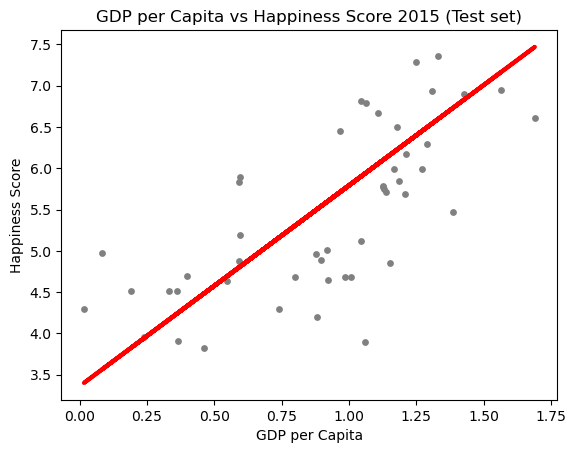

In [109]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score 2015 (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [110]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [111]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.43123401]]
Mean squared error:  0.5843373388848639
R2 score:  0.4035799527921242


Relationship of the variables:
By looking at the slope, we can say that the GDP and the Happiness Score have a positive relationship (as GDP rises, so does the Happiness Score)

How well is the model performing: 
With a MSE of 0.5843 I would say that this is a relatively small number compared to the y-Happiness score data spead (min:2.84 and max:7.59). This indicates that the model's predictions are fairly accurate on average. 

The R2 score of 0.4036 indicates that the model explains approximately 40% of the variance in the Happiness Score. A R2 score of 1 would indicate a perfect fit, so a R2 score of 0.4036 in our case suggests that the model explains a moderate amount of the variability in the Happiness Score based on the GDP. 

Overall our regression model seems to perform reasonably well. 

In [112]:
y_predicted

array([[6.59790598],
       [6.20210108],
       [4.68663999],
       [4.23537864],
       [6.12607639],
       [4.16309806],
       [3.8239166 ],
       [3.94141814],
       [5.8128362 ],
       [5.59332009],
       [5.94589764],
       [4.24755913],
       [6.05194807],
       [6.09500522],
       [4.807837  ],
       [5.53706133],
       [5.16393985],
       [4.79624002],
       [5.93789888],
       [4.80253691],
       [6.44967364],
       [5.7109675 ],
       [6.09668277],
       [6.39968747],
       [6.30644964],
       [6.49888182],
       [6.16599726],
       [6.8302347 ],
       [4.47949885],
       [4.32669579],
       [4.80552733],
       [6.24117101],
       [7.16243851],
       [3.39920433],
       [5.50406949],
       [5.89899914],
       [3.56219426],
       [6.29745408],
       [5.59813393],
       [5.49645972],
       [7.47001393],
       [5.75616414],
       [5.3029335 ],
       [5.89707846],
       [6.5398238 ],
       [6.11102706],
       [6.22658361],
       [6.729

In [113]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.364,6.597906
1,5.995,6.202101
2,4.633,4.686640
3,4.514,4.235379
4,5.716,6.126076
5,4.507,4.163098
6,4.512,3.823917
7,3.956,3.941418
8,4.686,5.812836
9,5.007,5.593320


##### Compare how the regression fits the training set

In [115]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [116]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [117]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.43123401]]
Mean squared error:  0.4879802716402545
R2 score:  0.6613317055208155


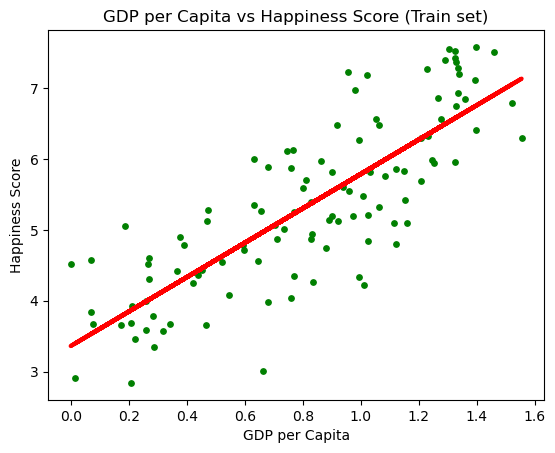

In [118]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Train set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

Trained Set:

Slope: 2.43123401
Mean Squared Error (MSE): 0.4879802716402545
R2 Score: 0.6613317055208155

Test Set:

Slope: 2.43123401
Mean Squared Error (MSE): 0.5843373388848639
R2 Score: 0.4035799527921242

Possible explanations for the changes:

Slope: The slope remained the same for both the trained and test sets this indicates that the relationship between GDP and Happiness Score is consistent across both sets.

Mean Squared Error (MSE): The MSE on the test set (0.5843) is slightly higher than that on the trained set (0.4880). The model's predictions have slightly higher errors on the test set compared to the trained set. When researching I found that it's common for models to perform slightly worse on unseen data (test set) compared to the data used for training.

R2 Score: The R2 score on the test set (0.4036) is lower than that on the trained set (0.6613). The model's ability to explain the variance in the Happiness Score based on GDP is lower when applied to the test set compared to the trained set. A lower R2 score on the test set suggests that the model might not generalize as well to unseen data.

Overall, while the model performs reasonably well on both the trained and test sets, the performance is worse on the test set compared to the trained set. This suggests that the model may not generalize perfectly to unseen data and could be improved by evaluating additional data.

#### Running the regression analysis again between Healthy life expectancy and Happpiness Score

In [121]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_2015['Healthy Life Expectancy'].values.reshape(-1,1)
y1 = df_2015['Happiness Score'].values.reshape(-1,1)

In [123]:
X1

array([[0.94143],
       [0.94784],
       [0.87464],
       [0.88521],
       [0.90563],
       [0.88911],
       [0.89284],
       [0.91087],
       [0.90837],
       [0.93156],
       [0.91387],
       [0.86027],
       [0.89042],
       [0.81444],
       [0.86179],
       [0.69702],
       [0.91894],
       [0.89533],
       [0.89667],
       [0.80925],
       [0.90943],
       [0.76276],
       [0.72052],
       [1.02525],
       [0.79661],
       [0.89186],
       [0.85857],
       [0.79733],
       [0.94579],
       [0.78723],
       [0.84483],
       [0.8116 ],
       [0.69077],
       [0.7385 ],
       [0.72025],
       [0.95562],
       [0.88721],
       [0.8753 ],
       [0.72492],
       [0.6082 ],
       [0.61483],
       [0.67737],
       [0.64425],
       [0.59772],
       [0.78902],
       [0.99111],
       [0.96538],
       [0.79075],
       [0.74716],
       [0.95446],
       [0.5392 ],
       [0.61826],
       [0.66098],
       [0.64368],
       [0.87337],
       [0.

In [124]:
y1

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [122]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#### Regression Analysis

In [125]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [126]:
# Fit the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [127]:
# Predict the values of y using X.

y1_predicted = regression.predict(X1_test)

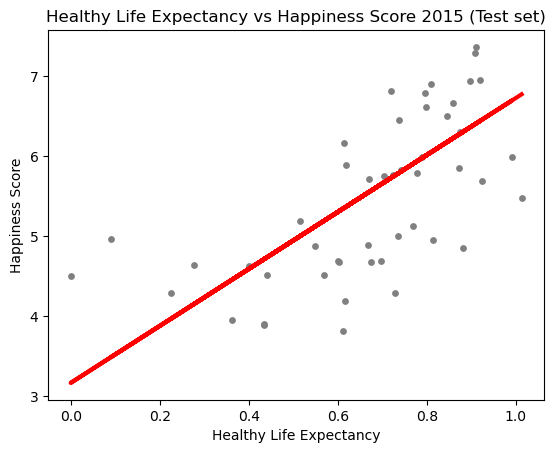

In [129]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Healthy Life Expectancy vs Happiness Score 2015 (Test set)')
plot_test.xlabel('Healthy Life Expectancy')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [132]:
# Create objects that contain the model summary statistics.

rmse_health_happiness = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2 = r2_score(y1_test, y1_predicted) # This is the R2 score. 

In [134]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_health_happiness)
print('R2 score: ', r2)

Slope: [[3.55646913]]
Mean squared error:  0.6177524296278911
R2 score:  0.36947391733588475


In [136]:
y1_predicted

array([[6.40806902],
       [5.97471326],
       [4.59587018],
       [5.19129424],
       [5.54879052],
       [3.16858799],
       [4.73539046],
       [4.46011975],
       [5.65118126],
       [5.78419321],
       [6.00170686],
       [4.71707465],
       [6.22206569],
       [5.74325825],
       [4.99896039],
       [5.54519848],
       [5.76217867],
       [5.12140962],
       [4.71109978],
       [5.81154246],
       [6.69344011],
       [5.79504044],
       [5.93918413],
       [6.39917785],
       [5.3552119 ],
       [6.28156542],
       [6.3058561 ],
       [6.04666063],
       [5.34208853],
       [5.30830208],
       [5.36741059],
       [6.27470143],
       [6.43676973],
       [3.97099856],
       [5.36335622],
       [5.73109513],
       [3.49332919],
       [6.45320062],
       [4.15330316],
       [6.06088651],
       [6.00426752],
       [5.3108983 ],
       [5.56529254],
       [5.9031571 ],
       [6.35756716],
       [5.67163096],
       [6.1731998 ],
       [6.772

In [137]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.364,6.408069
1,5.995,5.974713
2,4.633,4.595870
3,4.514,5.191294
4,5.716,5.548791
5,4.507,3.168588
6,4.512,4.735390
7,3.956,4.460120
8,4.686,5.651181
9,5.007,5.784193


##### Compare how the regression fits the training set

In [139]:
# Predict.

y1_predicted_train = regression.predict(X1_train) # This is predicting X_train!

In [140]:
rmse_health_happiness_train = mean_squared_error(y1_train, y1_predicted_train)
r2 = r2_score(y1_train, y1_predicted_train)

In [141]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_health_happiness_train)
print('R2 score: ', r2)

Slope: [[3.55646913]]
Mean squared error:  0.6254607615034393
R2 score:  0.5659174321740184


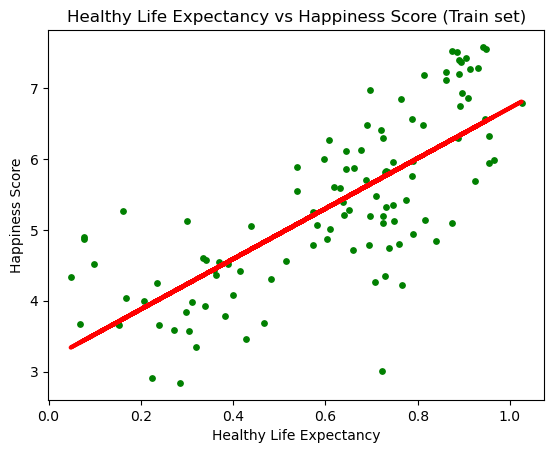

In [143]:
# Visualizing the training set results.

plot_train = plt
plot_train.scatter(X1_train, y1_train, color='green', s=15)
plot_train.plot(X1_train, y1_predicted_train, color='red', linewidth=3)
plot_train.title('Healthy Life Expectancy vs Happiness Score (Train set)')
plot_train.xlabel('Healthy Life Expectancy')
plot_train.ylabel('Happiness Score')
plot_train.show()

Trained set:

Slope: 3.5564
Mean squared error:  0.6254607615034393
R2 score:  0.5659174321740184

Test set: 

Slope: 3.5564
Mean squared error:  0.6177524296278911
R2 score:  0.36947391733588475

Possible explanations for the changes:

Slope: The slope remained the same for both the trained and test sets this indicates that the relationship between GDP and Happiness Score is consistent across both sets.

MSE: In this case, the performance in the test set is slightly better. 

R2 Scor). In the trained set, approximately 56.59% of the variance in happiness score is explained by healthy life expectancy, while in the test set, approximately 36.95% of the variance is explained
.
Overall, the trained model seems to perform better than the model tested on unseen da (e higher R2 score and lower mean squared err). . However, the R2 score for the test seindicatesof a moderate level of predictability.
